# Numerical Methods 01: Humble Beginnings

## Gabriel M Steward

### January 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (The one with really big numbers)

[Problem 2](#P2) (The one that looks like it's shouting)

[Problem 3](#P3) (The one that's too clever for its own good)

[Problem 4](#P4) (Obseravtions)

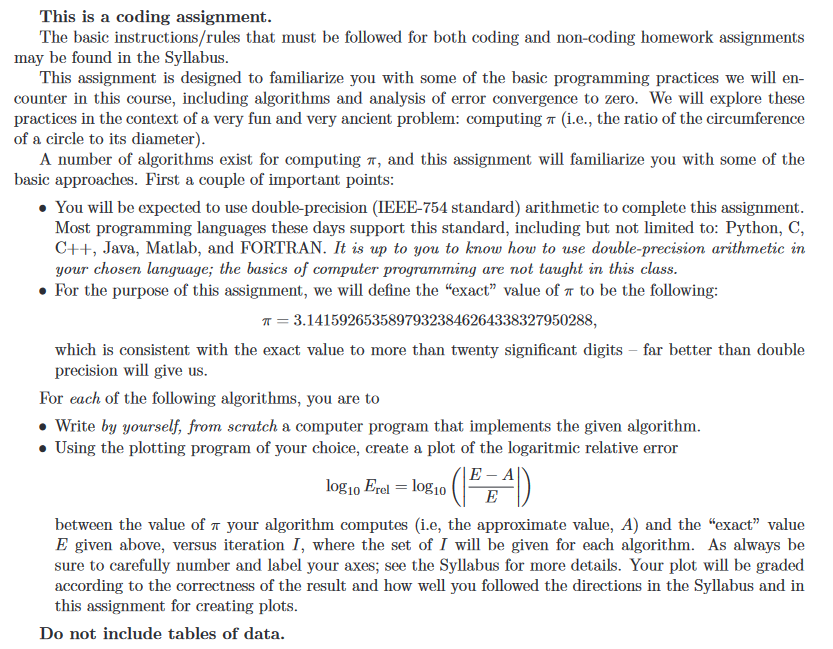

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

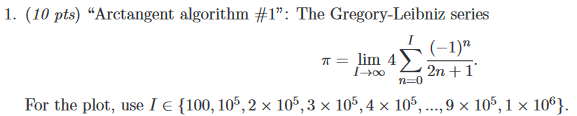

We programmed up the series in C and then pushed the data to a file that Python read and plotted via matplotlib. It seems like there's no need for any more discussion, seems pretty self-explanatory. For some scale, here are the start and end values:

The front values are I=100, pi estimate = 3.15149340107099, log relative errror = -2.50148188873242e+00

The end values are I=$10^6$, pi estimate = 3.14159365358877, log relative error = -6.49715031506710e+00 

Note that the log values are negative because all the errors are less than 1 and all logarithms of such values go negative. 

The plot gives us:

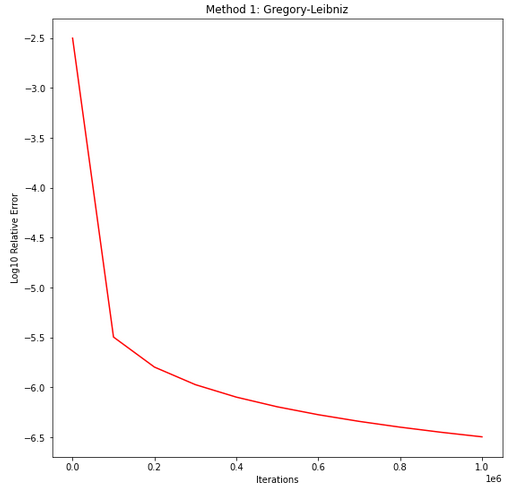

Out of curiosity we sampled more points to see more detail in the sharp change between step 100 and 100000

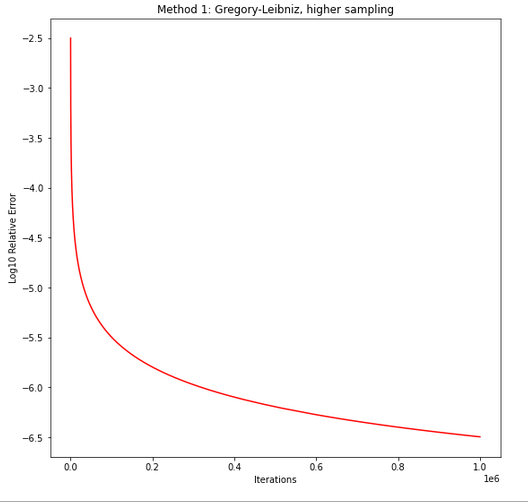

Turns out, it's quite smooth.

Bonus observation: we decided to let the program run as long as it could. It hit -9 log error before the counter n reached int overflow and ruined everything. 

<a id='P2'></a>

# Problem 2 \[Back to [top](#toc)\]
$$\label{P2}$$

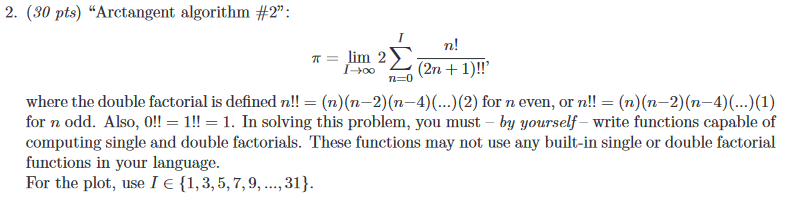

Essentially identical to the previous problem, except with different values. We briefely considered trying to restate the sum so the minimum number of operations would be performed for our factorial operation, but in the end decided that the program was so small it wasn't worth it. However, since we are dealing with large numbers, we did have to make sure the operation was performed with double rather than int since 31! on its own easily exceeds the maximum size for ints in C. 

After some hassle with programming in the 0 exception case, we got these edge values in the ordr I, estimate, log10 error. 

1, 2.66666666666667, -8.20523938806919e-01,

31, 3.14159265344763, -1.03443776967629e+01,

Which shows that the first one is not very accurate but by step 31 we already have -10 error, which is excellent. 

The graph is

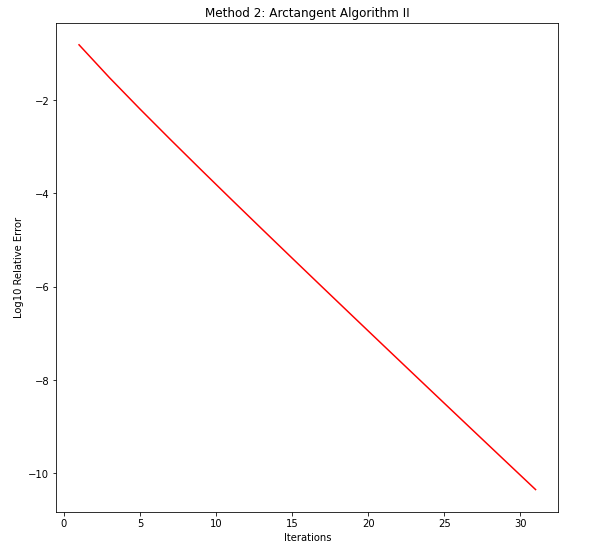 

which shows what appears to be a "linear" approach, in terms of the logarithmic error anyway. Naturally we decided to let the program run a long time and see what the result was. After the erorr hits -15.5 it then enters "not a number" territory. Which makes sense, as that is where roundoff error lies. (It arrives at NaN at step 171 by the way). 

<a id='P3'></a>

# Problem 3 \[Back to [top](#toc)\]
$$\label{P3}$$

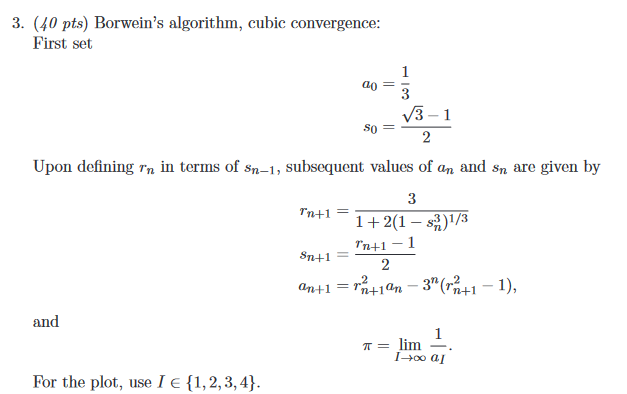

This was not difficult to code at all, and there were no hiccups in making it. The edge cases were:

1, 3.14159058520590e+00, -6.18151872496591e+00,
4, 3.14159265358980e+00, -1.44517396428851e+01,

This is remarkably quick, already at roundoff error by step 4. Impressive. However, this "by step 4" is a bit misleading. If we look at the whole data... 

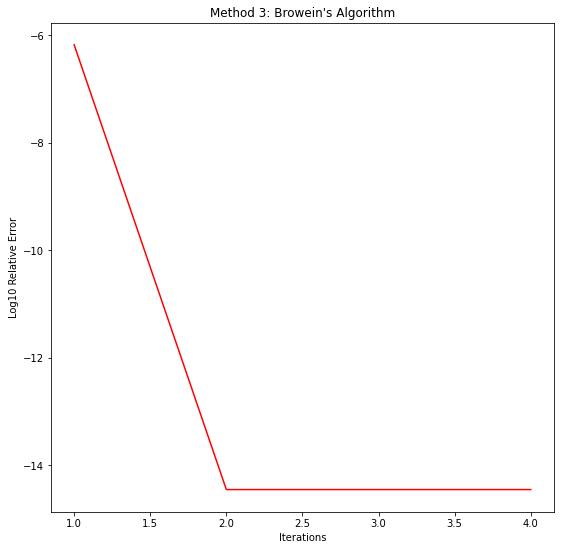

It actually hits the value in iteration 4 at iteration 2. This is not just a case of "Small adjustment," the number is exactly the same when it is printed to our data table for all digits. Digging into the results reveals why it settles so quickly: the s-values get very small very quickly, to the point at which after the second iteration they go below roundoff error and are treated as zero. Thus every r-value becomes 1, and then nothing ever changes. 

So unlike the rest, letting it run forever isn't going to reveal anything. What a shame. Fortunately it isn't going to report NaN ever, either. 

<a id='P4'></a>

# Problem 4 \[Back to [top](#toc)\]
$$\label{P4}$$

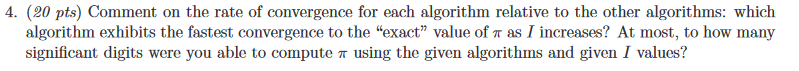

Rather clearly, method 3 is the fastest. It is so fast we only have two data points that are worth anything, and that's not really enough to get a visual representation of the order of convergence! Visusally, the number of "digits" (given by the negative of the log 10 error) goes like a negative exponential for method 1, linearly for method 2, and as for method 3... it's a sharp jump right to where roundoff rears its ugly head.

With our given I values, we got 6 digits, 10 digits, and 14 digits for methods 1, 2, and 3 respectively. 

However, we will like to point out that method 2 was able to, if let run for long enough, get 15 digits. This is because it was able to approach the answer gradually, unlike method 3 which tried to basically shoot there immediately. If the computer had higher precision, method 3 would certianly get more precise faster, but as it is it "overshoots" the answer and is actually not the best possible way to get the maximum number of digits! So while method 3 is "best," hardware considerations may lead a coder to choose a different method anyway. 